In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [35]:
X  = [[1,0.3,0.4],[-0.5,1,0],[1,0,1],[0.5,0.5,0.5],[0.3,0.6,0],[0,0.9,0.2],[0.3,1,0.9],[0.2,0.7,0.8],
     [0.8,0.7,0.2]]
Y = [0.3,0,0.2,-1,2,0.7,1.3,-1.4,0]
mod_reg  = tree.DecisionTreeRegressor(max_depth = 2)
mod_reg

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
mod_reg_fit = mod_reg.fit(X,Y)
mod_reg_fit.score(X,Y)

0.7201974183750949

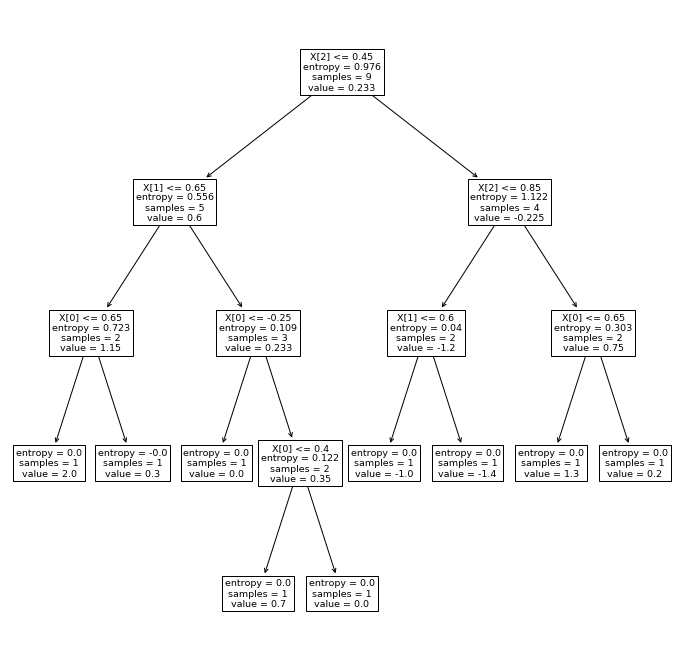

In [34]:
plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit)
plt.show()

In [37]:
Y_predict = mod_reg_fit.predict(X)
Y_predict

array([ 1.15      ,  0.23333333,  0.75      , -1.2       ,  1.15      ,
        0.23333333,  0.75      , -1.2       ,  0.23333333])

In [ ]:
Y = [0.3,0,0.2,-1,2,0.7,1.3,-1.4,0]

In [40]:
RSS = np.sum((Y - Y_predict)*(Y - Y_predict))
MSE = np.mean((Y - Y_predict)*(Y - Y_predict))
RMSE = np.sqrt(MSE)
print(RSS)
print(MSE)
print(RMSE)

2.4566666666666666
0.27296296296296296
0.5224585753559443


In [41]:
for j in np.arange(20)+2:
    mod_reg = tree.DecisionTreeRegressor(max_depth = j)
    mod_reg_fit = mod_reg.fit(X,Y)
    print("max_depth = ", j, "Score = ", mod_reg_fit.score(X,Y))

max_depth =  2 Score =  0.7201974183750949
max_depth =  3 Score =  0.9720956719817768
max_depth =  4 Score =  1.0
max_depth =  5 Score =  1.0
max_depth =  6 Score =  1.0
max_depth =  7 Score =  1.0
max_depth =  8 Score =  1.0
max_depth =  9 Score =  1.0
max_depth =  10 Score =  1.0
max_depth =  11 Score =  1.0
max_depth =  12 Score =  1.0
max_depth =  13 Score =  1.0
max_depth =  14 Score =  1.0
max_depth =  15 Score =  1.0
max_depth =  16 Score =  1.0
max_depth =  17 Score =  1.0
max_depth =  18 Score =  1.0
max_depth =  19 Score =  1.0
max_depth =  20 Score =  1.0
max_depth =  21 Score =  1.0


In [70]:
for j in np.arange(20)+2:
    mod = tree.DecisionTreeClassifier(max_depth = j)
    mod_cv = cross_val_score(mod, X, y, cv = 5)
    a = np.mean(mod_cv) - 2* np.std(mod_cv)
    b = np.mean(mod_cv) + 2* np.std(mod_cv)
    print("j->", j, "Confidence bounds ->", [a,b])

j-> 2 Confidence bounds -> [0.8390524291751269, 1.0276142374915396]
j-> 3 Confidence bounds -> [0.910111234843014, 1.009888765156986]
j-> 4 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 5 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 6 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 7 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 8 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 9 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 10 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 11 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 12 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 13 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 14 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 15 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 16 Confidence bounds -> [0.894680273525782

In [4]:
data = pd.read_csv("C:\\Users\\apoghosyan\\Desktop\\ISLR_Data\\Hitters.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [34]:
data.shape

(322, 21)

In [35]:
data_short = data.drop(["Unnamed: 0","League","Division",'NewLeague'], axis = 1)
data_short = data_short.dropna()
data_short.shape

(263, 17)

In [36]:
X = data_short.drop(["Salary"], axis = 1)
Y = data_short[["Salary"]]

In [37]:
X.shape

(263, 16)

In [38]:
Y.shape

(263, 1)

1.0


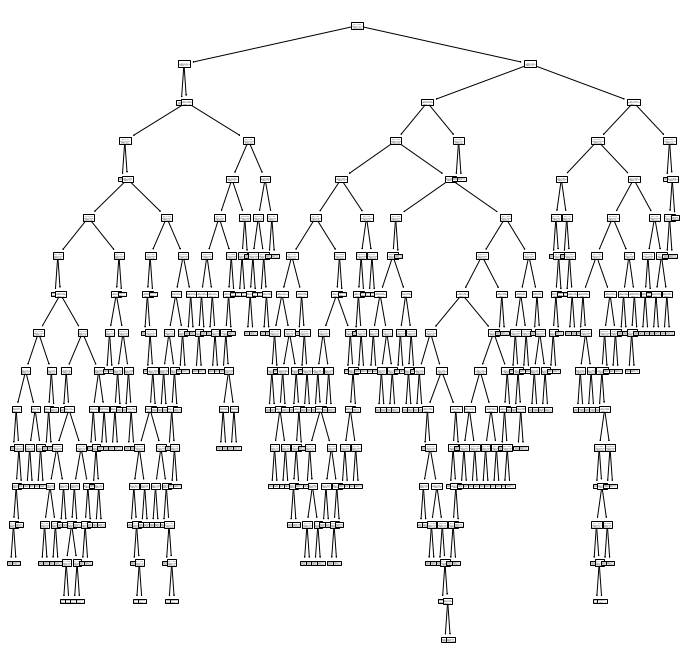

In [39]:
mod_reg = tree.DecisionTreeRegressor()
mod_reg_fit = mod_reg.fit(X,Y)
print(mod_reg.score(X,Y))

plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [42]:
score = np.array([])
size = Y_test.shape[0]
for j in np.arange(20)+2:
    mod_reg = tree.DecisionTreeRegressor(max_depth = j)
    mod_reg_fit = mod_reg.fit(X_train,Y_train)
    Y_predict = mod_reg_fit.predict(X_test)
    mse = np.mean((Y_predict - np.array(Y_test).reshape(size,))*(Y_predict - np.array(Y_test).reshape(size,)))
    score = np.append(score, mse)
    print("max_depth = ", j, "MSE = ", mse)

max_depth =  2 MSE =  144792.56052756897
max_depth =  3 MSE =  115927.64392654359
max_depth =  4 MSE =  188902.23097017742
max_depth =  5 MSE =  227053.4078212176
max_depth =  6 MSE =  236936.4394496273
max_depth =  7 MSE =  219858.07178318698
max_depth =  8 MSE =  235406.73645931302
max_depth =  9 MSE =  284078.47121590556
max_depth =  10 MSE =  241707.18055914584
max_depth =  11 MSE =  242384.12281890318
max_depth =  12 MSE =  241351.2106232317
max_depth =  13 MSE =  246224.85317688683
max_depth =  14 MSE =  282880.7357325283
max_depth =  15 MSE =  243878.38844026419
max_depth =  16 MSE =  247973.66768554717
max_depth =  17 MSE =  242120.78838520756
max_depth =  18 MSE =  243941.8951776604
max_depth =  19 MSE =  235277.90253615094
max_depth =  20 MSE =  240439.7163647925
max_depth =  21 MSE =  236884.7905157359


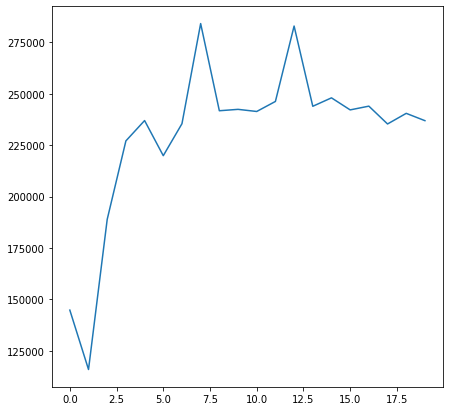

2

In [43]:
plt.figure(figsize = (7,7))
plt.plot(score)
plt.show()
max_depth = np.argmin(score)+1
max_depth

In [44]:
mod_reg = tree.DecisionTreeRegressor(max_depth = max_depth)
mod_reg_fit = mod_reg.fit(X,Y)
mod_reg_fit.score(X,Y)

0.5636703571838545

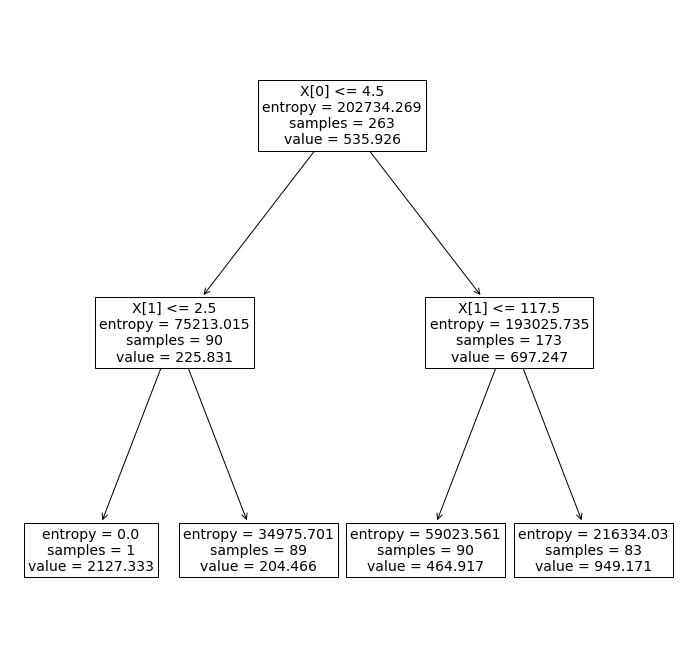

In [70]:
plt.figure(figsize = (12,12))
tree.plot_tree(mod_reg_fit)
plt.show()